In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
# Lo que se hace en esta sección es importar todas las librerias necesarias.

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
# Esta línea utiliza la libreria de pandas para crear un objeto llamado data que va a leer el archivo "data.csv"

In [ ]:
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
# Se crea un objeto profile de la libreria pandas-profiling para generar el informe de los datos proporcionados, describiendo estructura y el contenido

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Se llamó al objeto profile

In [ ]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [ ]:
# Se importan las librerias

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Se instala una librería necesaria para correr una línea de código más adelante

In [ ]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [ ]:
# Se crean 2 listas de puntuaciones las cuales guardan signos de puntucacion

In [ ]:
titulos = str
for titulo in data["Abstract"]:
    titulos = titulo + " " + str(titulos)
titulos

'Fault detection has been an active research field and increasingly important for the safety of technical processes and systems. A variety of fault detection methods have been developed that are generally designed for a specific system; therefore, they target limited types of fault. An efficient approach that could monitor the degradation conditions and be less problem-specific is necessary for improved reliability and efficiency. This paper presents an improved negative selection algorithm using specialized detectors that is model-free and independent of prior knowledge about fault types. An artificial immune system employs a negative selection algorithm and requires only normal (self) patterns for detector generation. In the training phase, uncovered gaps are identified and covered with new detectors to improve nonself (faulty) space coverage. Moreover, to alleviate the online detection, cost reshaping process of nonself space with detector clusters is performed. Theoretical analysis

In [ ]:
# Se recorre la sección Abstract que es una columna del objeto Data definido más arriba para guardar todos los títulos separados por espacios en blanco

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
# Se crea un objeto llamado stop_words tipo stopwords de la biblioteca nltk para crear una lista de palabras

In [ ]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [ ]:
# Se utilizan las listas punctuation definidas previamente para eliminar los signos de puntuación de objeto titulos definido más arriba

In [ ]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [ ]:
# Se utiliza el objeto llamado stop_words para limpiar el texto de las palabras que quiero eliminar.

In [ ]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [ ]:
# Se separa el texto en palabras individuales dentro de otra lista usando el metodo .split

In [ ]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [ ]:
# Se crea un diccionario para contar la cantidad de veces que aparece cada palabra en específico

In [ ]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

freq
learning      2573
data          2472
machine       1979
model         1663
models        1357
using         1285
artificial    1276
intelligence  1147
used          1143
2022          1122

In [ ]:
# Se crea un dataframe para ver las palabras y la cantidad de veces que aparece cada una

In [ ]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

In [ ]:
# Se utiliza el dataframe creado anteriormente y se utilizan 5 palabras principales para hacer un grafico de barras utilizando bar

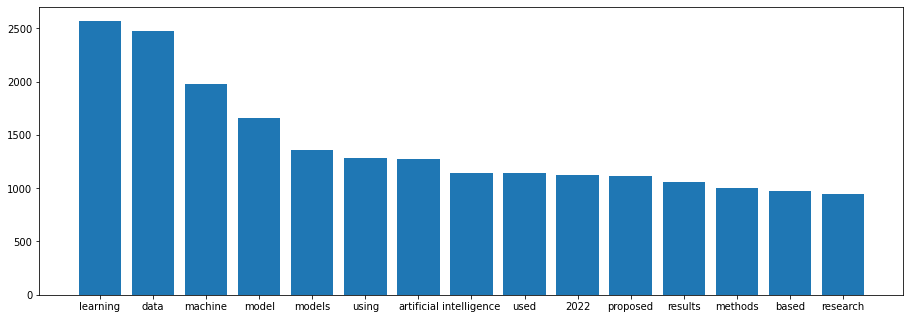

In [ ]:
plot_bar(data=df, top=15)

In [ ]:
# Se llama a la funcion definida anteriormente

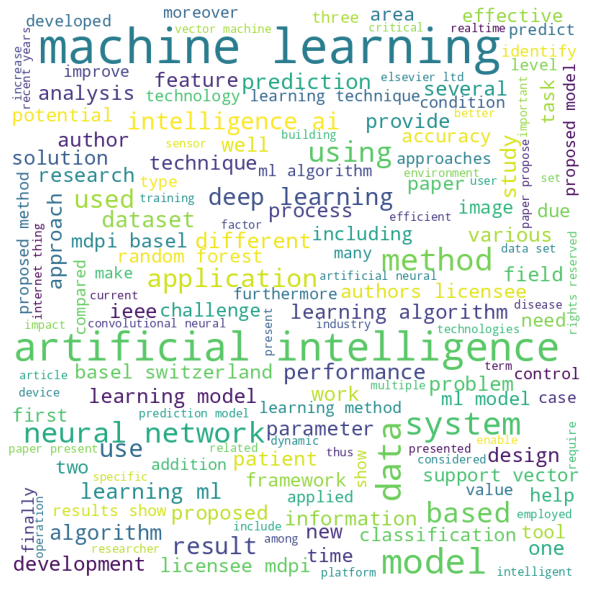

In [ ]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud.to_file("n1.png") 
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Se crea una lluvia de ideas con un tamaño especifico usando el objeto clean_texto

In [ ]:
data.head()

Authors  \
0  Alzahrani A.I.A.; Ayadi M.; Asiri M.M.; Al-Ras...   
1                       Xu Y.; Qian W.; Li N.; Li H.   
2  Apostolopoulos I.D.; Papandrianos N.I.; Papage...   
3  Chen J.; Zheng Y.; Liang Y.; Zhan Z.; Jiang M....   
4  Stergiou K.D.; Minopoulos G.M.; Memos V.A.; St...   

                                   Author full names  \
0  Alzahrani, Abdullah I. A. (57976422600); Ayadi...   
1  Xu, Yang (57189364114); Qian, Wenliang (572221...   
2  Apostolopoulos, Ioannis D. (57195641603); Papa...   
3  Chen, Jiarong (57745036200); Zheng, Yingfang (...   
4  Stergiou, Konstantinos D. (57225429048); Minop...   

                                        Author(s) ID  \
0  57976422600; 57751491300; 57579728000; 5599481...   
1  57189364114; 57222153328; 56802965400; 5721484...   
2  57195641603; 24779749100; 56429800100; 2406845...   
3  57745036200; 57745036300; 57744937000; 5774524...   
4  57225429048; 57216312631; 56453287200; 5719731...   

                                              Titles  Year  \
0  Detecting the Presence of Malware and Identify...  2022   
1  Typical advances of artificial intelligence in...  2022   
2  Artificial Intelligence Methods for Identifyin...  2022   
3  Edge2Analysis: A Novel AIoT Platform for Atria...  2022   
4  A Machine Learning-Based Model for Epidemic Fo...  2022   

                                        Source title Volume Issue Art. No.  \
0                          Electronics (Switzerland)     11    22     3665   
1                 Advances in Structural Engineering     25    16      NaN   
2          Machine Learning and Knowledge Extraction      4     4      NaN   
3  IEEE Journal of Biomedical and Health Informatics     26    12      NaN   
4                     Applied Sciences (Switzerland)     12    21    10766   

  Page start  ...  ISBN  CODEN   PubMed ID  Language of Original Document  \
0        NaN  ...   NaN    NaN         NaN                        English   
1       3405  ...   NaN  ASEDD         NaN                        English   
2        814  ...   NaN    NaN         NaN                        English   
3       5772  ...   NaN  ITIBF  35511842.0                        English   
4        NaN  ...   NaN    NaN         NaN                        English   

              Abbreviated Source Title Document Type Publication Stage  \
0            Electronics (Switzerland)       Article             Final   
1                    Adv. Struct. Eng.       Article             Final   
2            Mach. Learn. Knowl. Extr.        Review             Final   
3  IEEE J. Biomedical Health Informat.       Article             Final   
4                           Appl. Sci.        Review             Final   

                          Open Access  Source                 EID  
0   All Open Access; Gold Open Access  Scopus  2-s2.0-85142450469  
1                                 NaN  Scopus  2-s2.0-85141392045  
2   All Open Access; Gold Open Access  Scopus  2-s2.0-85144597221  
3  All Open Access; Green Open Access  Scopus  2-s2.0-85132510217  
4   All Open Access; Gold Open Access  Scopus  2-s2.0-85141860402  

[5 rows x 44 columns]